In [2]:
import pandas as pd
import numpy as np
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [3]:
df = pd.DataFrame(pd.read_csv('dataset/dwimedialestari.csv.csv'))
df = df.drop(columns=['Unnamed: 0', 'id'])

df = df.dropna(how='any',axis=0)
df = df.drop_duplicates()

categorical_features = pd.DataFrame(df.select_dtypes(include=['object']))
numeric_features = pd.DataFrame(df.select_dtypes(include=['int64', 'float64']))

In [4]:
# Label encoding
def label_encoding(data):
    encoded_data = data.copy()
    label_mapping = {}

    for column in encoded_data.columns:
        if encoded_data[column].dtype == 'object':
            unique_values = data[column].unique()
            label_mapping[column] = {}

            for i, value in enumerate(unique_values):
                label_mapping[column][value] = i
                encoded_data[column] = encoded_data[column].replace(value, i)

    return encoded_data


encoded_data = label_encoding(categorical_features)
encoded_data = pd.concat([encoded_data, numeric_features],axis=1) 

In [189]:
# Z-score normalization
def z_score_normalization(data):
    normalized_data = data.copy()

    for column in normalized_data.columns:
        if normalized_data[column].dtype != 'object':
            mean = normalized_data[column].mean()
            std = normalized_data[column].std()
            normalized_data[column] = (normalized_data[column] - mean) / std

    return normalized_data


normalized_data = z_score_normalization(encoded_data)

In [190]:
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(normalized_data)

In [191]:
def pca(data, num_components):
    # Menghitung rata-rata fitur numerik
    mean_vector = np.mean(numeric_features, axis=0)

    # Menghitung matriks kovarian
    cov_matrix = np.cov(numeric_features, rowvar=False)

    # Menghitung eigenvalues dan eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Mengurutkan eigenvalues dan eigenvectors secara menurun
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Memilih jumlah komponen PCA yang diinginkan
    selected_eigenvalues = sorted_eigenvalues[:num_components]
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Melakukan transformasi PCA
    pca_result = np.dot(numeric_features - mean_vector, selected_eigenvectors)

    # Membuat DataFrame hasil PCA
    pca_data = pd.DataFrame(data=pca_result, columns=['PC{}'.format(i+1) for i in range(num_components)])

    return pca_data


pca_data = pca(normalized_data, num_components=2)

In [192]:
pca_data

,PC1,PC2
0,1.362106e+08,3.022604e+06
1,1.362272e+08,3.622373e+06
2,1.365613e+08,1.602324e+06
3,1.308883e+08,2.295017e+06
4,1.308883e+08,2.295017e+06
...,...,...
2627,1.372907e+08,2.292348e+06
2628,1.323594e+08,-2.372602e+06
2629,1.364072e+08,1.456544e+06
2630,1.382410e+08,3.191323e+06


Text(0.5, 1.0, 'PCA Plot')

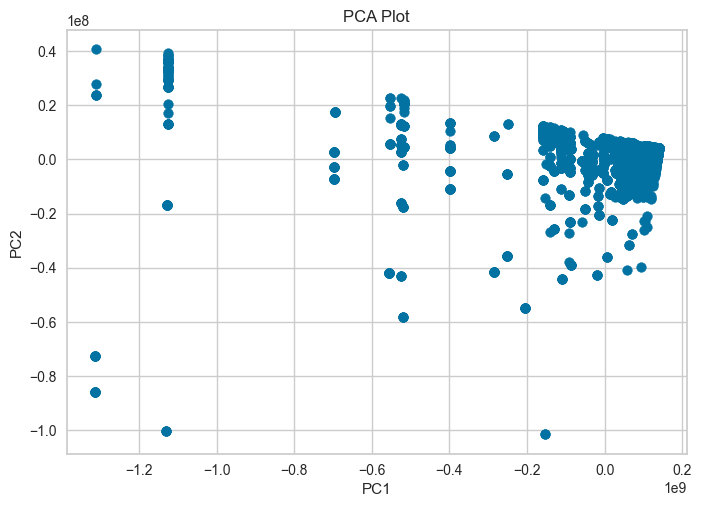

In [193]:
# Create a scatter plot
# plt.scatter(pca_data[:, 0], pca_data[:,1])
plt.scatter(pca_data['PC1'], pca_data['PC2'])
# Add labels or color points based on classes (if available)
# For example, assuming you have class labels in the 'labels' variable
# plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels)

# Add axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')

# Show the plot

Elbow Method to determine the number of clusters to be formed:


f:\mechine_learning\thesis_clustering_customers_segmentation\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\mechine_learning\thesis_clustering_customers_segmentation\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\mechine_learning\thesis_clustering_customers_segmentation\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\mechine_learning\thesis_clustering_customers_segmentation\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

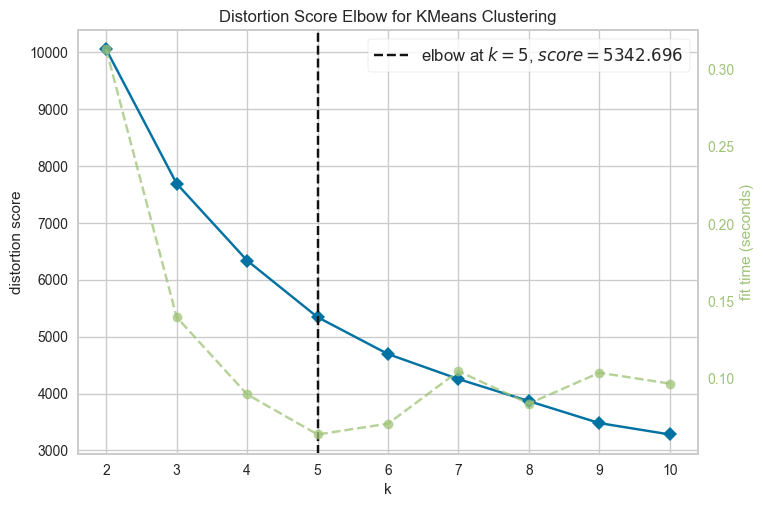

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [243]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(normalized_data)
Elbow_M.show()

In [268]:
hdb = HDBSCAN(min_samples=15, min_cluster_size=2)
fit = hdb.fit(normalized_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


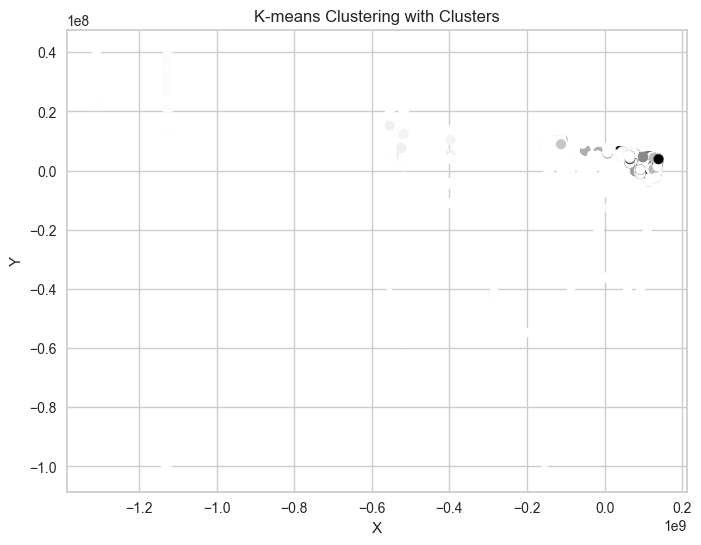

In [269]:
column = pca_data.columns.values.tolist()
u_labels = pd.unique(fit.labels_)
colors = np.random.rand(60)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[column[0]], pca_data[column[1]], c=fit.labels_)
plt.title(f'K-means Clustering with Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# plt.figure(figsize = (5,5))
# plt.scatter(x = pca_data[column[0]], y = pca_data[column[1]], alpha = 0.8, label = u_labels, c=fit.labels_)
# plt.grid()
# plt.title("2D CLuster")

In [270]:
u_labels

array([-1, 25,  9, 23, 32, 31, 22, 27, 30,  3,  0, 26, 20, 17, 10, 16, 18,
       12, 21,  2,  5, 13, 15,  1,  8, 28, 11, 19,  4, 14,  7, 29, 24,  6],
      dtype=int64)

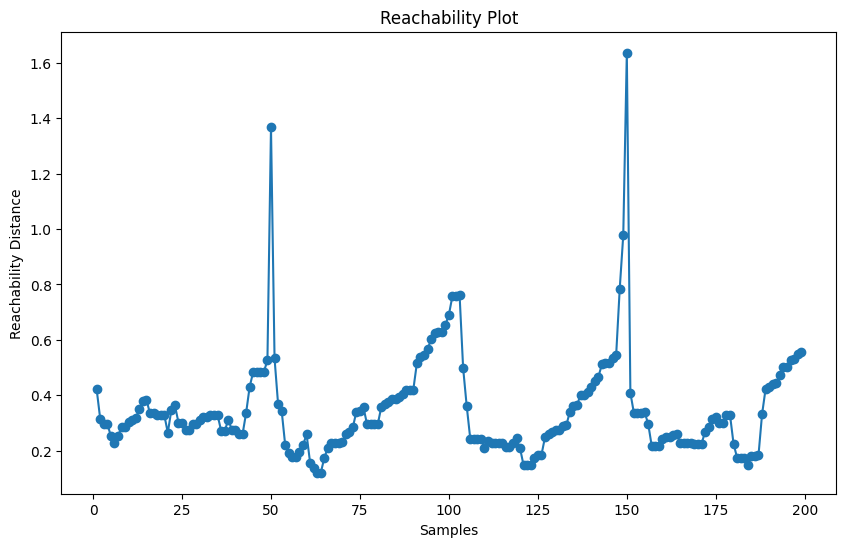

IndexError: list index out of range

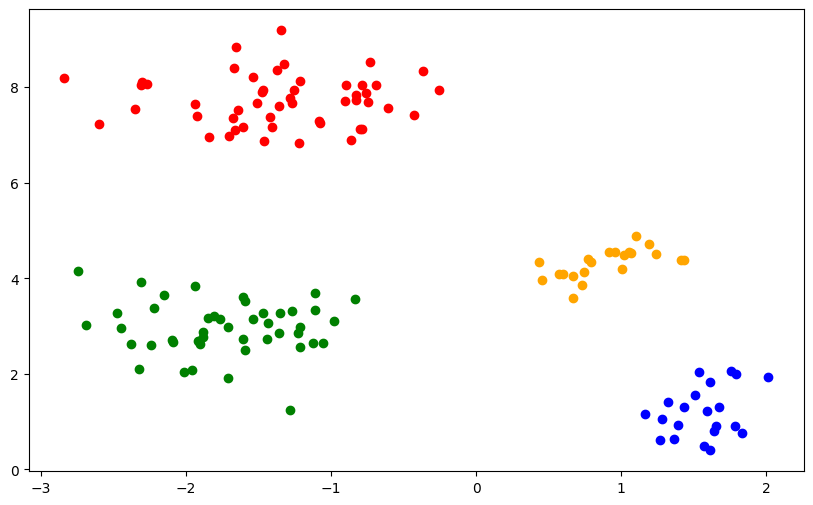

In [1]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=0)

# Perform OPTICS clustering
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
clustering.fit(X)

# Plotting the reachability distances
plt.figure(figsize=(10, 6))
plt.plot(clustering.reachability_[clustering.ordering_], marker='o')
plt.xlabel("Samples")
plt.ylabel("Reachability Distance")
plt.title("Reachability Plot")
plt.show()

# Plotting the clustering results
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red']
for i, label in enumerate(set(clustering.labels_)):
    cluster = X[clustering.labels_ == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f"Cluster {label}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("OPTICS Clustering")
plt.legend()
plt.show()
